## MINI Project 2 (영국시장의 중고 자동차 가격 데이터 다루기)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df.head() #emission class: 높을 수록 높은 규제를 통과한 차임ㅠ

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full  
4             NaN

In [5]:
brand_df.head()

title         country
0     skoda  Czech Republic
1  vauxhall  United Kingdom
2   hyundai     South Korea
3      mini  United Kingdom
4      ford   United States

In [6]:
car_df['title'].str.split()

0          [SKODA, FABIA]
1       [VAUXHALL, CORSA]
2          [HYUNDAI, I30]
3           [MINI, HATCH]
4       [VAUXHALL, CORSA]
              ...        
3682    [RENAULT, MEGANE]
3683           [AUDI, A4]
3684     [BMW, 3, SERIES]
3685      [HONDA, ACCORD]
3686    [VAUXHALL, CORSA]
Name: title, Length: 3687, dtype: object

In [7]:
car_df['title'].str.split(expand = True)

# car_df['title']: car_df라는 데이터프레임의 title 컬럼을 선택합니다.
# .str.split(): 문자열을 공백(기본값) 기준으로 나눕니다.
# expand=True: 결과를 여러 컬럼으로 나눠서 새로운 DataFrame으로 반환합니다.

0       1       2     3     4     5     6
0        SKODA   FABIA    None  None  None  None  None
1     VAUXHALL   CORSA    None  None  None  None  None
2      HYUNDAI     I30    None  None  None  None  None
3         MINI   HATCH    None  None  None  None  None
4     VAUXHALL   CORSA    None  None  None  None  None
...        ...     ...     ...   ...   ...   ...   ...
3682   RENAULT  MEGANE    None  None  None  None  None
3683      AUDI      A4    None  None  None  None  None
3684       BMW       3  SERIES  None  None  None  None
3685     HONDA  ACCORD    None  None  None  None  None
3686  VAUXHALL   CORSA    None  None  None  None  None

[3687 rows x 7 columns]

In [8]:
car_df['title'].str.split(expand = True)[0]
# 위와 동일하게 title 컬럼을 공백 기준으로 나눈 후,
# [0]: 나뉜 값 중 첫 번째 컬럼만 선택합니다.

0          SKODA
1       VAUXHALL
2        HYUNDAI
3           MINI
4       VAUXHALL
          ...   
3682     RENAULT
3683        AUDI
3684         BMW
3685       HONDA
3686    VAUXHALL
Name: 0, Length: 3687, dtype: object

In [9]:
car_df['brand'] = car_df['title'].str.split(expand = True)[0]

In [10]:
brand_df['title'].str.upper()

0             SKODA
1          VAUXHALL
2           HYUNDAI
3              MINI
4              FORD
5             VOLVO
6           PEUGEOT
7               BMW
8           CITROEN
9     MERCEDES-BENZ
10            MAZDA
11             SAAB
12       VOLKSWAGEN
13            HONDA
14               MG
15           TOYOTA
16             SEAT
17           NISSAN
18             ALFA
19          RENAULT
20              KIA
21           PROTON
22             FIAT
23             AUDI
24       MITSUBISHI
25            LEXUS
26             LAND
27        CHEVROLET
28           SUZUKI
29            DACIA
30         DAIHATSU
31             JEEP
32           JAGUAR
33         CHRYSLER
34            ROVER
35               DS
36           DAEWOO
37            DODGE
38          PORSCHE
39           SUBARU
40         INFINITI
41           ABARTH
42            SMART
43           MARCOS
44         MASERATI
45        SSANGYONG
46          LAGONDA
47            ISUZU
Name: title, dtype: object

In [11]:
brand_df['title'] = brand_df['title'].str.upper()

In [12]:
brand_df.head()

title         country
0     SKODA  Czech Republic
1  VAUXHALL  United Kingdom
2   HYUNDAI     South Korea
3      MINI  United Kingdom
4      FORD   United States

In [13]:
car_df.merge(brand_df, left_on = 'brand', right_on = 'title', how = 'left')

# car_df와 brand_df를 병합(merge)합니다
# 기준은 car_df의 'brand' 컬럼과 brand_df의 'title' 컬럼입니다
# how='left'는 car_df를 기준으로 모든 행을 유지하고, 일치하는 정보만 붙입니다
merged_df = car_df.merge(
    brand_df,              # 병합할 다른 데이터프레임
    left_on='brand',       # car_df에서 기준이 되는 컬럼
    right_on='title',      # brand_df에서 대응되는 컬럼
    how='left'             # LEFT JOIN 방식: car_df 기준으로 병합
)

# # 결과적으로 merged_df에는 car_df의 모든 행과 함께,
# 🔸 왼쪽 부분 (brand, model) → car_df에서
# 🔸 오른쪽 부분 (title, country) → brand_df
# → 기준은 brand == title 이 맞을 때만!

In [14]:
car_df = car_df.merge(brand_df, left_on = 'brand', right_on = 'title', how = 'left')

In [15]:
car_df

title_x  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history     brand   title_y         country  
0            Euro 6             NaN     SKODA     SKODA  Czech Republic  
1            Euro 4            Full  VAUXHALL  VAUXHALL  United Kingdom  
2            Euro 5             NaN   HYUNDAI   HYUNDAI     South Korea  
3            Euro 4            Full      MINI      MINI  United Kingdom  
4            Euro 5             NaN  VAUXHALL  VAUXHALL  United Kingdom  
...             ...             ...       ...       ...             ...  
3682         Euro 4             NaN   RENAULT   RENAULT          France  
3683         Euro 5             NaN      AUDI      AUDI         Germany  
3684         Euro 5             NaN       BMW       BMW         Germany  
3685         Euro 4            Full     HONDA     HONDA           Japan  
3686         Euro 5             NaN  VAUXHALL  VAUXHALL  United Kingdom  

[3687 rows x 16 columns]

In [16]:
# 'title_y' 컬럼을 car_df에서 삭제합니다
# 이 컬럼은 보통 merge 이후 생긴 중복 컬럼 중 하나입니다
# axis=1 은 '열'을 삭제하겠다는 의미입니다
# inplace=True 는 원본 데이터프레임(car_df)을 직접 수정하겠다는 뜻입니다

car_df.drop('title_y', axis = 1, inplace = True)

# car_df와 brand_df를 병합했을 때 같은 이름의 컬럼 'title'이 두 개 있다면,
# pandas는 자동으로 이름을 'title_x', 'title_y'로 바꿔서 중복을 방지합니다
# 예시 병합 결과
# | brand   | model  | title_x | title_y | country     |
# |---------|--------|---------|---------|-------------|
# | BMW     | X5     |   X5    |  BMW    | Germany     |

# 여기서 'title_y'는 브랜드 이름이고, 'title_x'는 모델 이름일 수 있어요.
# 둘 중 하나만 필요할 때 나머지 하나를 삭제하는 거예요!

In [17]:
car_df.head()

title_x  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history     brand         country  
0             NaN     SKODA  Czech Republic  
1            Full  VAUXHALL  United Kingdom  
2             NaN   HYUNDAI     South Korea  
3            Full      MINI  United Kingdom  
4             NaN  VAUXHALL  United Kingdom

In [18]:
car_df.rename({'title_x': 'title'}, axis = 1)

# 'title_x' 컬럼의 이름을 'title'로 바꿉니다
# rename 함수는 컬럼 이름이나 인덱스 값을 바꿀 때 사용돼요
# {'기존이름': '새이름'} 형태의 딕셔너리를 넣으면 이름을 바꿔줍니다
# axis=1 은 '열 방향'에서 이름을 바꾸겠다는 뜻 (행이면 axis=0)
# 이 코드는 반환값은 있지만, 원본 car_df는 그대로 유지돼요 (inplace 아님)

title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback   1.4L  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback   1.2L  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback   1.4L  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback   1.4L  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback   1.3L  Manual    5.0    5.0   
...               ...       ...        ...    ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback   1.6L  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon   2.0L  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon   2.0L  Manual    4.0    5.0   
3685              NaN    Diesel     Estate   2.2L  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback   1.2L  Manual    5.0    5.0   

     Emission Class Service history     brand         country  
0            Euro 6             NaN     SKODA  Czech Republic  
1            Euro 4            Full  VAUXHALL  United Kingdom  
2            Euro 5             NaN   HYUNDAI     South Korea  
3            Euro 4            Full      MINI  United Kingdom  
4            Euro 5             NaN  VAUXHALL  United Kingdom  
...             ...             ...       ...             ...  
3682         Euro 4             NaN   RENAULT          France  
3683         Euro 5             NaN      AUDI         Germany  
3684         Euro 5             NaN       BMW         Germany  
3685         Euro 4            Full     HONDA           Japan  
3686         Euro 5             NaN  VAUXHALL  United Kingdom  

[3687 rows x 15 columns]

In [19]:
car_df = car_df.rename({'title_x': 'title'}, axis = 1)

In [20]:
bonus_df = car_df.copy()

In [21]:
car_df.info() #engin, initial -> 그냥 숫자로 해도 사실은 무방.. (description에서 관련 정보를 보기 위해)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [22]:
car_df['Engine'].str.split('L')


0       [1.4, ]
1       [1.2, ]
2       [1.4, ]
3       [1.4, ]
4       [1.3, ]
         ...   
3682    [1.6, ]
3683    [2.0, ]
3684    [2.0, ]
3685    [2.2, ]
3686    [1.2, ]
Name: Engine, Length: 3687, dtype: object

In [23]:
car_df['Engine'].str.split('L', expand = True)[0]


0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: 0, Length: 3687, dtype: object

In [24]:
car_df['Engine'] = car_df['Engine'].str.split('L', expand = True)[0]

In [25]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [26]:
car_df['Emission Class'].str.split(expand = True)[1]

0       6
1       4
2       5
3       4
4       5
       ..
3682    4
3683    5
3684    5
3685    4
3686    5
Name: 1, Length: 3687, dtype: object

In [27]:
car_df['Emission Class'] = car_df['Emission Class'].str.split(expand = True)[1]

In [28]:
car_df.info() #엔진, emission class는 여전히 object (데이터가 저절로 바뀌지 않음)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [29]:
pd.to_numeric(car_df['Engine'])

0       1.4
1       1.2
2       1.4
3       1.4
4       1.3
       ... 
3682    1.6
3683    2.0
3684    2.0
3685    2.2
3686    1.2
Name: Engine, Length: 3687, dtype: float64

In [30]:
car_df['Engine'] = pd.to_numeric(car_df['Engine'])

In [31]:
car_df.info() #필요한 행의 값을 숫자로 바꾸어주기

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   float64
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 460.9+ KB


In [32]:
car_df.describe()

Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3687.000000    3.687000e+03        3687.000000      2276.000000   
mean    5787.301058    8.132854e+04        2011.846216         2.807557   
std     4480.629885    3.941718e+04           5.082387         1.546028   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2015.500000         4.000000   
max    33900.000000    1.110100e+06        2025.000000         9.000000   

            Engine        Doors        Seats  
count  3642.000000  3662.000000  3652.000000  
mean      1.606260     4.321409     4.900329  
std       0.486584     0.986760     0.577046  
min       0.800000     2.000000     2.000000  
25%       1.300000     3.000000     5.000000  
50%       1.600000     5.000000     5.000000  
75%       1.900000     5.000000     5.000000  
max       6.300000     5.000000     7.000000

## 결측치 처리

In [33]:
car_df['Service history'].unique()
#nan, full 값이 어떻게 나와?

array([nan, 'Full'], dtype=object)

In [34]:
car_df.groupby('Service history')['Price'].mean()

Service history
Full    7290.209259
Name: Price, dtype: float64

In [35]:
car_df['Service history'].fillna('Unknown')

0       Unknown
1          Full
2       Unknown
3          Full
4       Unknown
         ...   
3682    Unknown
3683    Unknown
3684    Unknown
3685       Full
3686    Unknown
Name: Service history, Length: 3687, dtype: object

In [36]:
car_df['Service history'] = car_df['Service history'].fillna('Unknown')

In [37]:
car_df.groupby('Service history')['Price'].mean() #가격 평균의 차이를 확인하기, 특히 null값의 경우에는 차이를 확인시키

Service history
Full       7290.209259
Unknown    5529.414045
Name: Price, dtype: float64

In [38]:
car_df['Engine'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3682    False
3683    False
3684    False
3685    False
3686    False
Name: Engine, Length: 3687, dtype: bool

In [39]:
car_df[car_df['Engine'].isna()] #engine이 null 값인 데이터들을 보여줌

title  Price  Mileage(miles)  Registration_Year  \
679         BMW 3 SERIES   4200           68060               2007   
835        TOYOTA MARK X   7500           77000               2021   
856         NISSAN CUBIC   4500           47000               2007   
1087             AUDI A1   7995           50500               2012   
1304        MAZDA MAZDA6   1500          155670               2015   
1429          FORD FOCUS   1895          109000               2009   
1533          CITROEN C1   3900           71000               2015   
1619             FORD KA   2490           68837               2007   
2022             AUDI A3   5750          139225               2012   
2136        TOYOTA PRIUS   8950           66000               2012   
2194         MAZDA MX-30  13899           13865               2021   
2288         NISSAN LEAF   5390           60695               2014   
2299         NISSAN LEAF   5390           60695               2014   
2337         NISSAN LEAF   5390           60695               2014   
2349         NISSAN LEAF   5390           60695               2014   
2361         NISSAN LEAF   5390           60695               2014   
2384         NISSAN LEAF   5390           60695               2014   
2394         NISSAN LEAF   5390           60695               2014   
2454         NISSAN LEAF   5390           60695               2014   
2465         NISSAN LEAF   5390           60695               2014   
2523           FIAT 500L   5250           79308               2015   
2573         NISSAN LEAF   5390           60695               2014   
2584         NISSAN LEAF   5390           60695               2014   
2645         NISSAN LEAF   5390           60695               2014   
2655         NISSAN LEAF   5390           60695               2014   
2675         NISSAN LEAF   5390           60695               2014   
2694         NISSAN LEAF   5390           60695               2014   
2711         NISSAN LEAF   5390           60695               2014   
2719  VAUXHALL ASTRA GTC   5995           76000               2014   
2743         NISSAN LEAF   5390           60695               2014   
2768         NISSAN LEAF   5390           60695               2014   
2790         NISSAN LEAF   5390           60695               2014   
2798         NISSAN LEAF   5390           60695               2014   
2832         NISSAN LEAF   5390           60695               2014   
3022         NISSAN LEAF   5390           60695               2014   
3031     VAUXHALL AMPERA   9499           65767               2014   
3034         NISSAN LEAF   5390           60695               2014   
3035         NISSAN LEAF   5390           60695               2014   
3067         NISSAN LEAF   5390           60695               2014   
3075         NISSAN LEAF   5390           60695               2014   
3098         NISSAN LEAF   5390           60695               2014   
3109         NISSAN LEAF   5390           60695               2014   
3199         NISSAN LEAF   5390           60695               2014   
3572       ISUZU TROOPER   2250          147700               2001   
3623      VAUXHALL CORSA  13998           28045               2020   

      Previous Owners              Fuel type  Body type  Engine    Gearbox  \
679               1.0                 Petrol     Saloon     NaN  Automatic   
835               3.0                 Petrol     Saloon     NaN  Automatic   
856               3.0                 Petrol  Hatchback     NaN     Manual   
1087              NaN                 Petrol  Hatchback     NaN  Automatic   
1304              1.0                 Diesel     Estate     NaN     Manual   
1429              NaN                 Petrol  Hatchback     NaN     Manual   
1533              3.0                 Petrol  Hatchback     NaN     Manual   
1619              4.0                 Petrol  Hatchback     NaN     Manual   
2022              3.0                 Diesel  Hatchback     NaN  Automatic   
2136              

In [40]:
car_df.isna().sum()

title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history         0
brand                   0
country                 0
dtype: int64

In [41]:
car_df.isna().sum(axis = 1)

0       0
1       0
2       1
3       0
4       1
       ..
3682    0
3683    1
3684    1
3685    1
3686    0
Length: 3687, dtype: int64

In [42]:
car_df['na_values'] = car_df.isna().sum(axis = 1)

In [43]:
car_df.head()

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type  Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback     1.4  Manual    5.0    5.0              6   
1    Petrol  Hatchback     1.2  Manual    3.0    5.0              4   
2    Petrol  Hatchback     1.4  Manual    5.0    5.0              5   
3    Petrol  Hatchback     1.4  Manual    3.0    4.0              4   
4    Diesel  Hatchback     1.3  Manual    5.0    5.0              5   

  Service history     brand         country  na_values  
0         Unknown     SKODA  Czech Republic          0  
1            Full  VAUXHALL  United Kingdom          0  
2         Unknown   HYUNDAI     South Korea          1  
3            Full      MINI  United Kingdom          0  
4         Unknown  VAUXHALL  United Kingdom          1

In [44]:
 car_df[car_df['na_values'] == 5] # 결측차가 5개 섞여 있는 

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
2136  TOYOTA PRIUS   8950           66000               2012              NaN   

          Fuel type  Body type  Engine    Gearbox  Doors  Seats  \
2136  Petrol Hybrid  Hatchback     NaN  Automatic    NaN    NaN   

     Emission Class Service history   brand country  na_values  
2136            NaN         Unknown  TOYOTA   Japan          5

In [45]:
 car_df[car_df['na_values'] >= 4] # 결측차가 4개 이상인, 전처리로 당첨

title  Price  Mileage(miles)  Registration_Year  \
513       NISSAN LAFESTA   3900           37000               2012   
679         BMW 3 SERIES   4200           68060               2007   
699       MITSUBISHI FTO   8900           58900               2001   
823      VOLKSWAGEN POLO   6700           49600               2012   
835        TOYOTA MARK X   7500           77000               2021   
856         NISSAN CUBIC   4500           47000               2007   
1304        MAZDA MAZDA6   1500          155670               2015   
1533          CITROEN C1   3900           71000               2015   
1619             FORD KA   2490           68837               2007   
2022             AUDI A3   5750          139225               2012   
2136        TOYOTA PRIUS   8950           66000               2012   
2523           FIAT 500L   5250           79308               2015   
2719  VAUXHALL ASTRA GTC   5995           76000               2014   

      Previous Owners      Fuel type  Body type  Engine    Gearbox  Doors  \
513               NaN         Petrol        MPV     2.0  Automatic    NaN   
679               1.0         Petrol     Saloon     NaN  Automatic    NaN   
699               NaN         Petrol      Coupe     2.0  Automatic    NaN   
823               NaN         Petrol  Hatchback     1.2  Automatic    NaN   
835               3.0         Petrol     Saloon     NaN  Automatic    NaN   
856               3.0         Petrol  Hatchback     NaN     Manual    NaN   
1304              1.0         Diesel     Estate     NaN     Manual    NaN   
1533              3.0         Petrol  Hatchback     NaN     Manual    NaN   
1619              4.0         Petrol  Hatchback     NaN     Manual    NaN   
2022              3.0         Diesel  Hatchback     NaN  Automatic    NaN   
2136              NaN  Petrol Hybrid  Hatchback     NaN  Automatic    NaN   
2523              1.0         Diesel        MPV     NaN  Automatic    NaN   
2719              3.0         Diesel      Coupe     NaN     Manual    NaN   

      Seats Emission Class Service history       brand         country  \
513     NaN            NaN         Unknown      NISSAN           Japan   
679     NaN            NaN            Full         BMW         Germany   
699     NaN            NaN         Unknown  MITSUBISHI           Japan   
823     NaN            NaN         Unknown  VOLKSWAGEN         Germany   
835     NaN            NaN         Unknown      TOYOTA           Japan   
856     NaN            NaN         Unknown      NISSAN           Japan   
1304    NaN            NaN         Unknown       MAZDA           Japan   
1533    NaN            NaN         Unknown     CITROEN          France   
1619    NaN            NaN            Full        FORD   United States   
2022    NaN            NaN         Unknown        AUDI         Germany   
2136    NaN            NaN         Unknown      TOYOTA           Japan   
2523    NaN            NaN            Full        FIAT           Italy   
2719    NaN            NaN         Unknown    VAUXHALL  United Kingdom   

      na_values  
513           4  
679           4  
699           4  
823           4  
835           4  
856           4  
1304          4  
1533          4  
1619          4  
2022          4  
2136          5  
2523          4  
2719          4

In [46]:
 car_df[car_df['na_values'] >= 3] # 결측차가 3개 이상인 

title  Price  Mileage(miles)  Registration_Year  \
8             VOLVO 740    750          225318               2025   
229   MERCEDES-BENZ 260   2995           57400               1991   
513      NISSAN LAFESTA   3900           37000               2012   
679        BMW 3 SERIES   4200           68060               2007   
699      MITSUBISHI FTO   8900           58900               2001   
...                 ...    ...             ...                ...   
3199        NISSAN LEAF   5390           60695               2014   
3464      TOYOTA CARINA   2450          120000               1991   
3572      ISUZU TROOPER   2250          147700               2001   
3623     VAUXHALL CORSA  13998           28045               2020   
3677          ROVER 800   3975           34000               1995   

      Previous Owners Fuel type  Body type  Engine    Gearbox  Doors  Seats  \
8                 NaN    Petrol     Estate     2.3  Automatic    5.0    NaN   
229               NaN    Petrol     Saloon     2.6  Automatic    4.0    NaN   
513               NaN    Petrol        MPV     2.0  Automatic    NaN    NaN   
679               1.0    Petrol     Saloon     NaN  Automatic    NaN    NaN   
699               NaN    Petrol      Coupe     2.0  Automatic    NaN    NaN   
...               ...       ...        ...     ...        ...    ...    ...   
3199              NaN  Electric  Hatchback     NaN  Automatic    5.0    5.0   
3464              NaN    Petrol     Saloon     1.6     Manual    4.0    NaN   
3572              NaN    Diesel        SUV     NaN  Automatic    5.0    5.0   
3623              NaN  Electric  Hatchback     NaN  Automatic    5.0    5.0   
3677              NaN    Petrol     Saloon     2.7  Automatic    4.0    NaN   

     Emission Class Service history          brand         country  na_values  
8               NaN         Unknown          VOLVO          Sweden          3  
229             NaN         Unknown  MERCEDES-BENZ         Germany          3  
513             NaN         Unknown         NISSAN           Japan          4  
679             NaN            Full            BMW         Germany          4  
699             NaN         Unknown     MITSUBISHI           Japan          4  
...             ...             ...            ...             ...        ...  
3199            NaN         Unknown         NISSAN           Japan          3  
3464            NaN         Unknown         TOYOTA           Japan          3  
3572            NaN         Unknown          ISUZU           Japan          3  
3623            NaN         Unknown       VAUXHALL  United Kingdom          3  
3677            NaN         Unknown          ROVER  United Kingdom          3  

[61 rows x 16 columns]

In [47]:
car_df = car_df[car_df['na_values'] < 4] # 결측차가 4개 이상인, 전처리로 당첨

In [48]:
car_df.drop('na_values', axis = 1, inplace = True) #warning, 지금 단계에서는 그냥 넘어가도 괜찮음

In [49]:
car_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382961
Fuel type            0.000000
Body type            0.000000
Engine               0.009526
Gearbox              0.000000
Doors                0.003266
Seats                0.005988
Emission Class       0.020142
Service history      0.000000
brand                0.000000
country              0.000000
dtype: float64

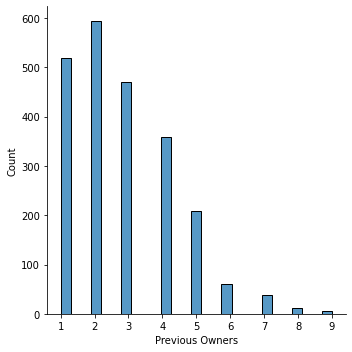

In [50]:
sns.displot(car_df['Previous Owners']) #데이터의 분포 형태, median 값으로 채워주기는 조금 애매한 상황임

In [51]:
car_df['Previous Owners'].median()

3.0

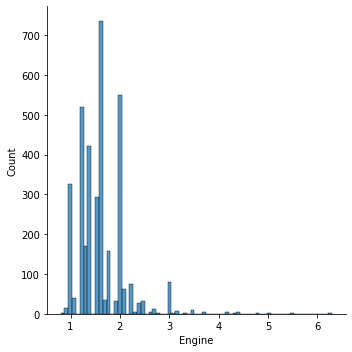

In [52]:
sns.displot(car_df['Engine'])

In [53]:
car_df['Engine'].mean()

1.6061555372355043

In [54]:
car_df['Engine'].median() #거의 비슷

1.6

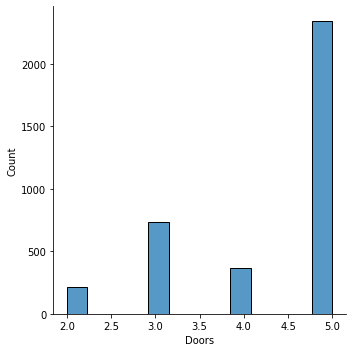

In [55]:
sns.displot(car_df['Doors'])

In [56]:
car_df['Doors'].median()

5.0

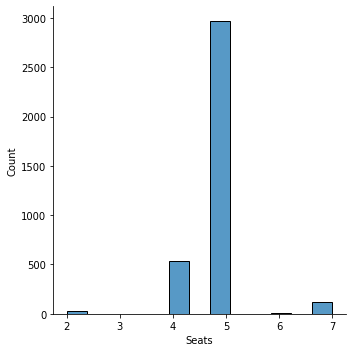

In [57]:
sns.displot(car_df['Seats'])

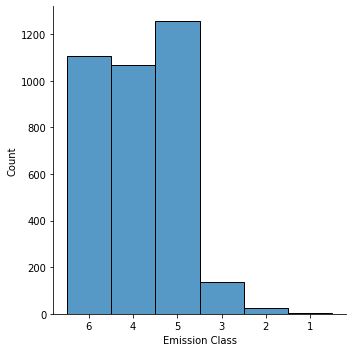

In [58]:
sns.displot(car_df['Emission Class'])

In [59]:
car_df.fillna(car_df.median()) #warning 은 일단 무시

/tmp/ipykernel_141/3715237719.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car_df.fillna(car_df.median()) #warning 은 일단 무시


title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type  Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback     1.4  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback     1.2  Manual    3.0    5.0   
2                 3.0    Petrol  Hatchback     1.4  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback     1.4  Manual    3.0    4.0   
4                 3.0    Diesel  Hatchback     1.3  Manual    5.0    5.0   
...               ...       ...        ...     ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback     1.6  Manual    5.0    5.0   
3683              3.0    Petrol     Saloon     2.0  Manual    4.0    5.0   
3684              3.0    Diesel     Saloon     2.0  Manual    4.0    5.0   
3685              3.0    Diesel     Estate     2.2  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback     1.2  Manual    5.0    5.0   

     Emission Class Service history     brand         country  
0                 6         Unknown     SKODA  Czech Republic  
1                 4            Full  VAUXHALL  United Kingdom  
2                 5         Unknown   HYUNDAI     South Korea  
3                 4            Full      MINI  United Kingdom  
4                 5         Unknown  VAUXHALL  United Kingdom  
...             ...             ...       ...             ...  
3682              4         Unknown   RENAULT          France  
3683              5         Unknown      AUDI         Germany  
3684              5         Unknown       BMW         Germany  
3685              4            Full     HONDA           Japan  
3686              5         Unknown  VAUXHALL  United Kingdom  

[3674 rows x 15 columns]

## Outliner 

In [60]:
car_df.describe()

Price  Mileage(miles)  Registration_Year  Previous Owners  \
count   3674.000000    3.674000e+03        3674.000000      2267.000000   
mean    5788.852477    8.134587e+04        2011.847305         2.808999   
std     4486.599984    3.943769e+04           5.083173         1.547468   
min      400.000000    1.000000e+00        1953.000000         1.000000   
25%     2490.000000    5.698400e+04        2008.000000         2.000000   
50%     4000.000000    8.000000e+04        2012.000000         3.000000   
75%     7995.000000    1.030000e+05        2016.000000         4.000000   
max    33900.000000    1.110100e+06        2025.000000         9.000000   

            Engine        Doors        Seats  
count  3639.000000  3662.000000  3652.000000  
mean      1.606156     4.321409     4.900329  
std       0.486650     0.986760     0.577046  
min       0.800000     2.000000     2.000000  
25%       1.300000     3.000000     5.000000  
50%       1.600000     5.000000     5.000000  
75%       1.900000     5.000000     5.000000  
max       6.300000     5.000000     7.000000

In [61]:
car_df['Price'].sort_values()

3245      400
3278      450
1238      495
3246      499
3429      500
        ...  
3102    25995
3230    25995
3224    28240
2936    30000
3212    33900
Name: Price, Length: 3674, dtype: int64

In [62]:
car_df['Mileage(miles)'].sort_values() #확인이 필요함

3219          1
3100          1
2013          6
3102        222
2760       1048
         ...   
1259     274100
1283     274100
2048     274100
1946     274100
1037    1110100
Name: Mileage(miles), Length: 3674, dtype: int64

In [63]:
car_df[car_df['Mileage(miles)'] < 1000]

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
2013       MG ZT  15500               6               2004              4.0   
3100    MG MG ZS  18365               1               2023              NaN   
3102  SEAT ATECA  25995             222               2023              NaN   
3219    MG MG ZS  18515               1               2023              NaN   

     Fuel type Body type  Engine Gearbox  Doors  Seats Emission Class  \
2013    Petrol    Saloon     1.8  Manual    4.0    5.0              3   
3100    Petrol       SUV     1.5  Manual    5.0    5.0              6   
3102    Petrol       SUV     1.5  Manual    5.0    5.0              6   
3219    Petrol       SUV     1.5  Manual    5.0    5.0              6   

     Service history brand         country  
2013         Unknown    MG  United Kingdom  
3100         Unknown    MG  United Kingdom  
3102         Unknown  SEAT           Spain  
3219         Unknown    MG  United Kingdom

In [64]:
car_df = car_df[car_df['Mileage(miles)'] > 1000]

In [65]:
car_df['Registration_Year'].sort_values()

3024    1953
237     1972
2375    1981
1239    1985
1353    1987
        ... 
3140    2022
2760    2023
3173    2023
2967    2023
8       2025
Name: Registration_Year, Length: 3670, dtype: int64

In [66]:
car_df[car_df['Registration_Year'] < 2025]

title  Price  Mileage(miles)  Registration_Year  \
0        SKODA FABIA   6900           70189               2016   
1     VAUXHALL CORSA   1495           88585               2008   
2        HYUNDAI I30    949          137000               2011   
3         MINI HATCH   2395           96731               2010   
4     VAUXHALL CORSA   1000           85000               2013   
...              ...    ...             ...                ...   
3682  RENAULT MEGANE   1395           76202               2006   
3683         AUDI A4   6990          119000               2012   
3684    BMW 3 SERIES   3995          139000               2013   
3685    HONDA ACCORD   1390          179190               2007   
3686  VAUXHALL CORSA   2000           82160               2013   

      Previous Owners Fuel type  Body type  Engine Gearbox  Doors  Seats  \
0                 3.0    Diesel  Hatchback     1.4  Manual    5.0    5.0   
1                 4.0    Petrol  Hatchback     1.2  Manual    3.0    5.0   
2                 NaN    Petrol  Hatchback     1.4  Manual    5.0    5.0   
3                 5.0    Petrol  Hatchback     1.4  Manual    3.0    4.0   
4                 NaN    Diesel  Hatchback     1.3  Manual    5.0    5.0   
...               ...       ...        ...     ...     ...    ...    ...   
3682              4.0    Petrol  Hatchback     1.6  Manual    5.0    5.0   
3683              NaN    Petrol     Saloon     2.0  Manual    4.0    5.0   
3684              NaN    Diesel     Saloon     2.0  Manual    4.0    5.0   
3685              NaN    Diesel     Estate     2.2  Manual    5.0    5.0   
3686              7.0    Petrol  Hatchback     1.2  Manual    5.0    5.0   

     Emission Class Service history     brand         country  
0                 6         Unknown     SKODA  Czech Republic  
1                 4            Full  VAUXHALL  United Kingdom  
2                 5         Unknown   HYUNDAI     South Korea  
3                 4            Full      MINI  United Kingdom  
4                 5         Unknown  VAUXHALL  United Kingdom  
...             ...             ...       ...             ...  
3682              4         Unknown   RENAULT          France  
3683              5         Unknown      AUDI         Germany  
3684              5         Unknown       BMW         Germany  
3685              4            Full     HONDA           Japan  
3686              5         Unknown  VAUXHALL  United Kingdom  

[3669 rows x 15 columns]

In [67]:
car_df = car_df[car_df['Registration_Year'] < 2025]

In [68]:
car_df['Previous Owners'].sort_values()

1282    1.0
2680    1.0
2462    1.0
1670    1.0
3088    1.0
       ... 
3677    NaN
3680    NaN
3683    NaN
3684    NaN
3685    NaN
Name: Previous Owners, Length: 3669, dtype: float64

In [69]:
car_df[car_df['Previous Owners'] == 9]

title  Price  Mileage(miles)  Registration_Year  \
212   VAUXHALL CORSA   1500           96270               2008   
404     BMW 3 SERIES   2500          138910               2003   
1314      MINI HATCH   1875           98710               2007   
3331  PEUGEOT 207 SW    895          114312               2008   
3463  PEUGEOT 207 SW   1450          115000               2009   

      Previous Owners Fuel type    Body type  Engine Gearbox  Doors  Seats  \
212               9.0    Petrol    Hatchback     1.4  Manual    5.0    5.0   
404               9.0    Petrol  Convertible     2.5  Manual    2.0    4.0   
1314              9.0    Petrol    Hatchback     1.6  Manual    3.0    4.0   
3331              9.0    Petrol       Estate     1.4  Manual    5.0    5.0   
3463              9.0    Petrol       Estate     1.4  Manual    5.0    5.0   

     Emission Class Service history     brand         country  
212               4         Unknown  VAUXHALL  United Kingdom  
404               3         Unknown       BMW         Germany  
1314              4         Unknown      MINI  United Kingdom  
3331              4         Unknown   PEUGEOT          France  
3463              4         Unknown   PEUGEOT          France

## 본격적인 문제

In [70]:
# Q. brand 컬럼의 값에 따라 데이터를 그룹화하여 Price의 평균, 표준편차를 계산합니다.
# (agg() 함수를 사용해주세요.)

car_df.groupby('brand')['Price'].agg(['mean', 'std'])

mean          std
brand                                   
ABARTH         11216.333333  6039.482621
ALFA            3197.388889  2495.694814
AUDI            7719.527397  4866.621560
BMW             8325.981343  6036.639654
CHEVROLET       3331.642857  1306.453191
CHRYSLER        2433.800000   796.043152
CITROEN         4652.873684  3291.745835
DACIA           7439.571429  3647.734338
DAEWOO           995.000000          NaN
DAIHATSU        1695.000000   282.842712
DODGE           3250.000000          NaN
DS             14293.833333  7117.793490
FIAT            4115.359223  2352.965329
FORD            4859.144254  3641.400692
HONDA           3871.953704  2954.578030
HYUNDAI         4997.118280  3881.244925
INFINITI        8625.714286  1925.935419
ISUZU           2250.000000          NaN
JAGUAR          8680.766667  4615.343456
JEEP            2949.444444  3012.049182
KIA             7733.073171  4010.219035
LAGONDA        14995.000000          NaN
LAND           10741.428571  7919.428085
LEXUS           4213.222222  2166.570665
MARCOS         11495.000000          NaN
MASERATI       13300.000000  3044.667470
MAZDA           5489.528302  4458.803175
MERCEDES-BENZ   7703.041667  5530.324245
MG              5622.285714  7405.182098
MINI            6480.175258  3885.228516
MITSUBISHI      3061.718750  3432.848861
NISSAN          6529.415730  3970.426951
PEUGEOT         5463.955102  4315.582212
PORSCHE         5451.666667  3488.661396
PROTON          2226.666667  1571.466937
RENAULT         5623.371429  4175.557582
ROVER           2382.800000   984.872682
SAAB            2983.428571  1425.397822
SEAT            4522.389831  3468.099504
SKODA           5569.619048  3347.865138
SMART           5621.250000   792.731302
SSANGYONG       8636.000000  6164.556918
SUBARU          3376.363636  1850.951230
SUZUKI          5076.853659  3687.674074
TOYOTA          5282.544041  4087.345760
VAUXHALL        4658.207650  3350.954458
VOLKSWAGEN      6513.217712  5005.653200
VOLVO           3755.282051  2613.062470

In [71]:
# Q. brand와 Fuel type 컬럼을 기준으로 Price 값의 피벗 테이블을 생성합니다.

pd.pivot_table(car_df, index = 'brand', columns = 'Fuel type', values = 'Price')

Fuel type            Diesel  Diesel Hybrid  Electric        Petrol  \
brand                                                                
ABARTH                  NaN            NaN       NaN  11216.333333   
ALFA            4214.666667            NaN       NaN   2688.750000   
AUDI            8731.301205            NaN       NaN   6386.555556   
BMW             7342.022222        23220.0       NaN   7058.486239   
CHEVROLET       5249.500000            NaN       NaN   3012.000000   
CHRYSLER                NaN            NaN       NaN   2433.800000   
CITROEN         4026.891892            NaN       NaN   5052.206897   
DACIA           6754.600000            NaN       NaN   7820.111111   
DAEWOO                  NaN            NaN       NaN    995.000000   
DAIHATSU                NaN            NaN       NaN   1695.000000   
DODGE                   NaN            NaN       NaN   3250.000000   
DS             14025.000000            NaN       NaN  10981.000000   
FIAT            5036.777778            NaN       NaN   4027.138298   
FORD            5567.482759            NaN       NaN   4578.709898   
HONDA           6361.321429            NaN       NaN   2884.120000   
HYUNDAI         5815.222222            NaN       NaN   4440.534247   
INFINITI        8582.000000            NaN       NaN   8888.000000   
ISUZU           2250.000000            NaN       NaN           NaN   
JAGUAR          8717.807692            NaN       NaN   8440.000000   
JEEP            1915.833333            NaN       NaN   5016.666667   
KIA             7103.000000            NaN       NaN   7858.075472   
LAGONDA                 NaN            NaN       NaN  14995.000000   
LAND           11336.833333            NaN       NaN   7169.000000   
LEXUS                   NaN            NaN       NaN   4209.857143   
MARCOS                  NaN            NaN       NaN  11495.000000   
MASERATI       13900.000000            NaN       NaN  13000.000000   
MAZDA           6725.000000            NaN   13899.0   4952.951220   
MERCEDES-BENZ   7243.145833            NaN       NaN   8316.236111   
MG                      NaN            NaN       NaN   5622.285714   
MINI            6334.785714            NaN       NaN   6504.698795   
MITSUBISHI      2440.761905            NaN       NaN   4247.181818   
NISSAN          6679.380000            NaN    5390.0   6787.444444   
PEUGEOT         6438.769841            NaN       NaN   4431.798319   
PORSCHE         8105.000000            NaN       NaN   4125.000000   
PROTON                  NaN            NaN       NaN   2226.666667   
RENAULT         4312.788462            NaN       NaN   6177.439024   
ROVER                   NaN            NaN       NaN   2382.800000   
SAAB                    NaN            NaN       NaN   2983.428571   
SEAT            5917.000000            NaN       NaN   4046.954545   
SKODA           5364.900000            NaN       NaN   5925.652174   
SMART           5400.000000            NaN       NaN   5695.000000   
SSANGYONG       8636.000000            NaN       NaN           NaN   
SUBARU          4990.000000            NaN       NaN   3215.000000   
SUZUKI          6886.000000            NaN       NaN   3507.451613   
TOYOTA          3180.920000            NaN       NaN   4368.142857   
VAUXHALL        4341.878505            NaN   13998.0   4702.904545   
VOLKSWAGEN      5466.855556            NaN       NaN   6985.865922   
VOLVO           4465.045455            NaN       NaN   2836.764706   

Fuel type      Petrol Hybrid  Petrol Plug-in Hybrid  
brand                                                
ABARTH                   NaN                    NaN  
ALFA                     NaN                    NaN  
AUDI                     NaN                    NaN  
BMW                      NaN           19460.652174  
CHEVROLET                NaN                    NaN  
CHRYSLER                 NaN                    NaN  
CITROEN                  NaN                    NaN  
DACIA        

In [72]:
car_df.head()

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type  Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback     1.4  Manual    5.0    5.0              6   
1    Petrol  Hatchback     1.2  Manual    3.0    5.0              4   
2    Petrol  Hatchback     1.4  Manual    5.0    5.0              5   
3    Petrol  Hatchback     1.4  Manual    3.0    4.0              4   
4    Diesel  Hatchback     1.3  Manual    5.0    5.0              5   

  Service history     brand         country  
0         Unknown     SKODA  Czech Republic  
1            Full  VAUXHALL  United Kingdom  
2         Unknown   HYUNDAI     South Korea  
3            Full      MINI  United Kingdom  
4         Unknown  VAUXHALL  United Kingdom

<AxesSubplot:xlabel='Previous Owners', ylabel='Price'>

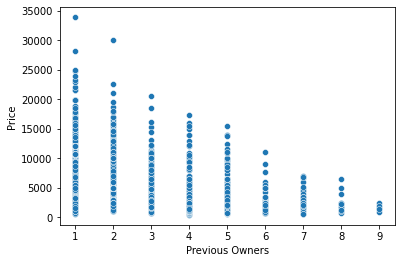

In [73]:
# Previous Owners와 Price 사이의 scatter plot을 그립니다.
#선형 관계인지를 알아보기 위해 그래프 그려보기

sns.scatterplot( x= car_df['Previous Owners'], y = car_df['Price'])

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

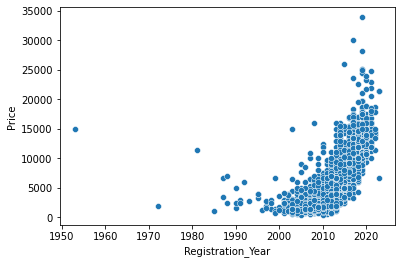

In [74]:
# Registration_Year와 Price 사이의 scatter plot을 그립니다.
#직선 보다는 곡선 형태 (log를 취해야 함을 알 수 있음)

sns.scatterplot( x= car_df['Registration_Year'], y = car_df['Price'])

<AxesSubplot:xlabel='Registration_Year', ylabel='Price'>

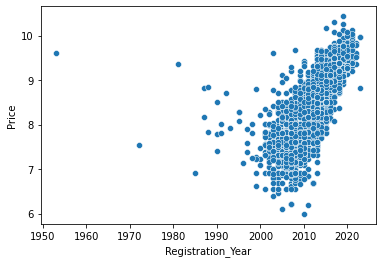

In [75]:
sns.scatterplot( x= car_df['Registration_Year'], y = np.log(car_df['Price']))
#price 에 로그를 취하였음, 예측에 대한 결과값을 해석

In [76]:
car_df.head()

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type  Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback     1.4  Manual    5.0    5.0              6   
1    Petrol  Hatchback     1.2  Manual    3.0    5.0              4   
2    Petrol  Hatchback     1.4  Manual    5.0    5.0              5   
3    Petrol  Hatchback     1.4  Manual    3.0    4.0              4   
4    Diesel  Hatchback     1.3  Manual    5.0    5.0              5   

  Service history     brand         country  
0         Unknown     SKODA  Czech Republic  
1            Full  VAUXHALL  United Kingdom  
2         Unknown   HYUNDAI     South Korea  
3            Full      MINI  United Kingdom  
4         Unknown  VAUXHALL  United Kingdom

## Scaler 활용하기

In [77]:
car_df.head()

title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA FABIA   6900           70189               2016              3.0   
1  VAUXHALL CORSA   1495           88585               2008              4.0   
2     HYUNDAI I30    949          137000               2011              NaN   
3      MINI HATCH   2395           96731               2010              5.0   
4  VAUXHALL CORSA   1000           85000               2013              NaN   

  Fuel type  Body type  Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback     1.4  Manual    5.0    5.0              6   
1    Petrol  Hatchback     1.2  Manual    3.0    5.0              4   
2    Petrol  Hatchback     1.4  Manual    5.0    5.0              5   
3    Petrol  Hatchback     1.4  Manual    3.0    4.0              4   
4    Diesel  Hatchback     1.3  Manual    5.0    5.0              5   

  Service history     brand         country  
0         Unknown     SKODA  Czech Republic  
1            Full  VAUXHALL  United Kingdom  
2         Unknown   HYUNDAI     South Korea  
3            Full      MINI  United Kingdom  
4         Unknown  VAUXHALL  United Kingdom

In [78]:
# 특정 컬럼들이 몇 종류의 데이터로 이루어져 있는지 계산합니다
car_df[['title', 'Fuel type', 'Body type', 'Gearbox', 'Emission Class', 'Service history', 'brand', 'country']].nunique() 

title              448
Fuel type            6
Body type           10
Gearbox              2
Emission Class       6
Service history      2
brand               48
country             12
dtype: int64

In [79]:
car_df.drop('title', axis = 1, inplace = True)

In [80]:
# 자동차의 브랜드별로 데이터의 개수를 계산합니다.
car_df['brand'].value_counts()

VAUXHALL         549
FORD             409
VOLKSWAGEN       271
BMW              268
PEUGEOT          245
TOYOTA           193
NISSAN           178
RENAULT          175
MERCEDES-BENZ    168
AUDI             146
HONDA            108
FIAT             103
MINI              97
CITROEN           95
HYUNDAI           93
KIA               82
SKODA             63
SEAT              59
MAZDA             53
SUZUKI            41
VOLVO             39
LAND              35
MITSUBISHI        32
JAGUAR            30
ALFA              18
CHEVROLET         14
DACIA             14
SUBARU            11
LEXUS              9
JEEP               9
MG                 7
SAAB               7
INFINITI           7
DS                 6
CHRYSLER           5
ROVER              5
SMART              4
MASERATI           3
ABARTH             3
PROTON             3
PORSCHE            3
DAIHATSU           2
SSANGYONG          2
DODGE              1
DAEWOO             1
MARCOS             1
LAGONDA            1
ISUZU        

In [81]:
# 자동차의 브랜드별로 평균 가격을 계산합니다
car_df.groupby('brand')['Price'].mean()

brand
ABARTH           11216.333333
ALFA              3197.388889
AUDI              7719.527397
BMW               8325.981343
CHEVROLET         3331.642857
CHRYSLER          2433.800000
CITROEN           4652.873684
DACIA             7439.571429
DAEWOO             995.000000
DAIHATSU          1695.000000
DODGE             3250.000000
DS               14293.833333
FIAT              4115.359223
FORD              4859.144254
HONDA             3871.953704
HYUNDAI           4997.118280
INFINITI          8625.714286
ISUZU             2250.000000
JAGUAR            8680.766667
JEEP              2949.444444
KIA               7733.073171
LAGONDA          14995.000000
LAND             10741.428571
LEXUS             4213.222222
MARCOS           11495.000000
MASERATI         13300.000000
MAZDA             5489.528302
MERCEDES-BENZ     7703.041667
MG                5622.285714
MINI              6480.175258
MITSUBISHI        3061.718750
NISSAN            6529.415730
PEUGEOT           5463.955102
PORS

In [82]:
pd.DataFrame(car_df['brand'].value_counts()).join(car_df.groupby('brand')['Price'].mean())
#보고 others 로 정리할 부분은 정리
# Q. 자동차의 브랜드별로 데이터 개수와 평균 가격을 출력합니다. 
# (위에서 출력했던 데이터 두 가지를 join 메서드로 합쳐주세요.)

brand         Price
VAUXHALL         549   4658.207650
FORD             409   4859.144254
VOLKSWAGEN       271   6513.217712
BMW              268   8325.981343
PEUGEOT          245   5463.955102
TOYOTA           193   5282.544041
NISSAN           178   6529.415730
RENAULT          175   5623.371429
MERCEDES-BENZ    168   7703.041667
AUDI             146   7719.527397
HONDA            108   3871.953704
FIAT             103   4115.359223
MINI              97   6480.175258
CITROEN           95   4652.873684
HYUNDAI           93   4997.118280
KIA               82   7733.073171
SKODA             63   5569.619048
SEAT              59   4522.389831
MAZDA             53   5489.528302
SUZUKI            41   5076.853659
VOLVO             39   3755.282051
LAND              35  10741.428571
MITSUBISHI        32   3061.718750
JAGUAR            30   8680.766667
ALFA              18   3197.388889
CHEVROLET         14   3331.642857
DACIA             14   7439.571429
SUBARU            11   3376.363636
LEXUS              9   4213.222222
JEEP               9   2949.444444
MG                 7   5622.285714
SAAB               7   2983.428571
INFINITI           7   8625.714286
DS                 6  14293.833333
CHRYSLER           5   2433.800000
ROVER              5   2382.800000
SMART              4   5621.250000
MASERATI           3  13300.000000
ABARTH             3  11216.333333
PROTON             3   2226.666667
PORSCHE            3   5451.666667
DAIHATSU           2   1695.000000
SSANGYONG          2   8636.000000
DODGE              1   3250.000000
DAEWOO             1    995.000000
MARCOS             1  11495.000000
LAGONDA            1  14995.000000
ISUZU              1   2250.000000

In [83]:
pd.get_dummies(car_df)

Price  Mileage(miles)  Registration_Year  Previous Owners  Engine  \
0      6900           70189               2016              3.0     1.4   
1      1495           88585               2008              4.0     1.2   
2       949          137000               2011              NaN     1.4   
3      2395           96731               2010              5.0     1.4   
4      1000           85000               2013              NaN     1.3   
...     ...             ...                ...              ...     ...   
3682   1395           76202               2006              4.0     1.6   
3683   6990          119000               2012              NaN     2.0   
3684   3995          139000               2013              NaN     2.0   
3685   1390          179190               2007              NaN     2.2   
3686   2000           82160               2013              7.0     1.2   

      Doors  Seats  Fuel type_Diesel  Fuel type_Diesel Hybrid  \
0       5.0    5.0                 1                        0   
1       3.0    5.0                 0                        0   
2       5.0    5.0                 0                        0   
3       3.0    4.0                 0                        0   
4       5.0    5.0                 1                        0   
...     ...    ...               ...                      ...   
3682    5.0    5.0                 0                        0   
3683    4.0    5.0                 0                        0   
3684    4.0    5.0                 1                        0   
3685    5.0    5.0                 1                        0   
3686    5.0    5.0                 0                        0   

      Fuel type_Electric  ...  country_Germany  country_Italy  country_Japan  \
0                      0  ...                0              0              0   
1                      0  ...                0              0              0   
2                      0  ...                0              0              0   
3                      0  ...                0              0              0   
4                      0  ...                0              0              0   
...                  ...  ...              ...            ...            ...   
3682                   0  ...                0              0              0   
3683                   0  ...                1              0              0   
3684                   0  ...                1              0              0   
3685                   0  ...                0              0              1   
3686                   0  ...                0              0              0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                    0                0                    0              0   
1                    0                0                    0              0   
2                    0                0                    1              0   
3                    0                0                    0              0   
4                    0                0                    0              0   
...                ...              ...                  ...            ...   
3682                 0                0                    0              0   
3683                 0                0                    0              0   
3684                 0                0                    0              0   
3685                 0                0                    0              0   
3686                 0                0                    0              0   

      country_Sweden  country_United Kingdom  country_United States  
0                  0                       0                      0  
1                  0                       1                      0  
2                  0                       0                      0  
3                  0                       1                      0  
4                  0                       1                    

In [84]:
pd.get_dummies(car_df, drop_first = True)
# 범주형 컬럼들에 원-핫 인코딩을 적용합니다.

Price  Mileage(miles)  Registration_Year  Previous Owners  Engine  \
0      6900           70189               2016              3.0     1.4   
1      1495           88585               2008              4.0     1.2   
2       949          137000               2011              NaN     1.4   
3      2395           96731               2010              5.0     1.4   
4      1000           85000               2013              NaN     1.3   
...     ...             ...                ...              ...     ...   
3682   1395           76202               2006              4.0     1.6   
3683   6990          119000               2012              NaN     2.0   
3684   3995          139000               2013              NaN     2.0   
3685   1390          179190               2007              NaN     2.2   
3686   2000           82160               2013              7.0     1.2   

      Doors  Seats  Fuel type_Diesel Hybrid  Fuel type_Electric  \
0       5.0    5.0                        0                   0   
1       3.0    5.0                        0                   0   
2       5.0    5.0                        0                   0   
3       3.0    4.0                        0                   0   
4       5.0    5.0                        0                   0   
...     ...    ...                      ...                 ...   
3682    5.0    5.0                        0                   0   
3683    4.0    5.0                        0                   0   
3684    4.0    5.0                        0                   0   
3685    5.0    5.0                        0                   0   
3686    5.0    5.0                        0                   0   

      Fuel type_Petrol  ...  country_Germany  country_Italy  country_Japan  \
0                    0  ...                0              0              0   
1                    1  ...                0              0              0   
2                    1  ...                0              0              0   
3                    1  ...                0              0              0   
4                    0  ...                0              0              0   
...                ...  ...              ...            ...            ...   
3682                 1  ...                0              0              0   
3683                 1  ...                1              0              0   
3684                 0  ...                1              0              0   
3685                 0  ...                0              0              1   
3686                 1  ...                0              0              0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                    0                0                    0              0   
1                    0                0                    0              0   
2                    0                0                    1              0   
3                    0                0                    0              0   
4                    0                0                    0              0   
...                ...              ...                  ...            ...   
3682                 0                0                    0              0   
3683                 0                0                    0              0   
3684                 0                0                    0              0   
3685                 0                0                    0              0   
3686                 0                0                    0              0   

      country_Sweden  country_United Kingdom  country_United States  
0                  0                       0                      0  
1                  0                       1                      0  
2                  0                       0                      0  
3                  0                       1                      0  
4                  0                       1                    

In [85]:
car_df = pd.get_dummies(car_df, drop_first = True)

In [86]:
from sklearn.preprocessing import RobustScaler

In [87]:
# Q. Robust Scaler를 rs 변수로 정의해줍니다.

rs = RobustScaler()

In [88]:
# Q. robust scaling을 적용한 데이터프레임을 car_df 변수에 다시 저장합니다.

rs.fit_transform(car_df)

array([[ 5.26793824e-01, -2.13208449e-01,  5.71428571e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.55040872e-01,  1.86565542e-01, -5.71428571e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-5.54223433e-01,  1.23869958e+00, -1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.08265213e-04,  1.28216273e+00,  1.42857143e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.74114441e-01,  2.15555459e+00, -7.14285714e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.63306085e-01,  4.69401947e-02,  1.42857143e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [89]:
pd.DataFrame(rs.fit_transform(car_df))

0         1         2    3         4    5    6    7    8    9   \
0     0.526794 -0.213208  0.571429  0.0 -0.333333  0.0  0.0  0.0  0.0 -1.0   
1    -0.455041  0.186566 -0.571429  0.5 -0.666667 -1.0  0.0  0.0  0.0  0.0   
2    -0.554223  1.238700 -0.142857  NaN -0.333333  0.0  0.0  0.0  0.0  0.0   
3    -0.291553  0.363591 -0.285714  1.0 -0.333333 -1.0 -1.0  0.0  0.0  0.0   
4    -0.544959  0.108658  0.142857  NaN -0.500000  0.0  0.0  0.0  0.0 -1.0   
...        ...       ...       ...  ...       ...  ...  ...  ...  ...  ...   
3664 -0.473206 -0.082537 -0.857143  0.5  0.000000  0.0  0.0  0.0  0.0  0.0   
3665  0.543143  0.847531  0.000000  NaN  0.666667 -0.5  0.0  0.0  0.0  0.0   
3666 -0.000908  1.282163  0.142857  NaN  0.666667 -0.5  0.0  0.0  0.0 -1.0   
3667 -0.474114  2.155555 -0.714286  NaN  1.000000  0.0  0.0  0.0  0.0 -1.0   
3668 -0.363306  0.046940  0.142857  2.0 -0.666667  0.0  0.0  0.0  0.0  0.0   

      ...   76   77   78   79   80   81   82   83   84   85  
0     ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1     ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2     ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3     ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
4     ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
3664  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3665  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3666  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3667  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3668  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  

[3669 rows x 86 columns]

In [90]:
pd.DataFrame(rs.fit_transform(car_df), columns = car_df.columns)

Price  Mileage(miles)  Registration_Year  Previous Owners    Engine  \
0     0.526794       -0.213208           0.571429              0.0 -0.333333   
1    -0.455041        0.186566          -0.571429              0.5 -0.666667   
2    -0.554223        1.238700          -0.142857              NaN -0.333333   
3    -0.291553        0.363591          -0.285714              1.0 -0.333333   
4    -0.544959        0.108658           0.142857              NaN -0.500000   
...        ...             ...                ...              ...       ...   
3664 -0.473206       -0.082537          -0.857143              0.5  0.000000   
3665  0.543143        0.847531           0.000000              NaN  0.666667   
3666 -0.000908        1.282163           0.142857              NaN  0.666667   
3667 -0.474114        2.155555          -0.714286              NaN  1.000000   
3668 -0.363306        0.046940           0.142857              2.0 -0.666667   

      Doors  Seats  Fuel type_Diesel Hybrid  Fuel type_Electric  \
0       0.0    0.0                      0.0                 0.0   
1      -1.0    0.0                      0.0                 0.0   
2       0.0    0.0                      0.0                 0.0   
3      -1.0   -1.0                      0.0                 0.0   
4       0.0    0.0                      0.0                 0.0   
...     ...    ...                      ...                 ...   
3664    0.0    0.0                      0.0                 0.0   
3665   -0.5    0.0                      0.0                 0.0   
3666   -0.5    0.0                      0.0                 0.0   
3667    0.0    0.0                      0.0                 0.0   
3668    0.0    0.0                      0.0                 0.0   

      Fuel type_Petrol  ...  country_Germany  country_Italy  country_Japan  \
0                 -1.0  ...              0.0            0.0            0.0   
1                  0.0  ...              0.0            0.0            0.0   
2                  0.0  ...              0.0            0.0            0.0   
3                  0.0  ...              0.0            0.0            0.0   
4                 -1.0  ...              0.0            0.0            0.0   
...                ...  ...              ...            ...            ...   
3664               0.0  ...              0.0            0.0            0.0   
3665               0.0  ...              1.0            0.0            0.0   
3666              -1.0  ...              1.0            0.0            0.0   
3667              -1.0  ...              0.0            0.0            1.0   
3668               0.0  ...              0.0            0.0            0.0   

      country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0                  0.0              0.0                  0.0            0.0   
1                  0.0              0.0                  0.0            0.0   
2                  0.0              0.0                  1.0            0.0   
3                  0.0              0.0                  0.0            0.0   
4                  0.0              0.0                  0.0            0.0   
...                ...              ...                  ...            ...   
3664               0.0              0.0                  0.0            0.0   
3665               0.0              0.0                  0.0            0.0   
3666               0.0              0.0                  0.0            0.0   
3667               0.0              0.0                  0.0            0.0   
3668               0.0              0.0                  0.0            0.0   

      country_Sweden  country_United Kingdom  country_United States  
0                0.0                     0.0                    0.0  
1                0.0                     1.0                    0.0  
2                0.0                     0.0                    0.0  
3                0.0                     1.0                    0.0  
4      

In [91]:
car_df = pd.DataFrame(rs.fit_transform(car_df), columns = car_df.columns)

In [92]:
from sklearn.decomposition import PCA

In [93]:
# Q. 주성분이 5개인 PCA 모델을 정의합니다.
pca = PCA(5)

In [94]:
print(car_df.isnull().sum())


Price                        0
Mileage(miles)               0
Registration_Year            0
Previous Owners           1403
Engine                      35
                          ... 
country_South Korea          0
country_Spain                0
country_Sweden               0
country_United Kingdom       0
country_United States        0
Length: 86, dtype: int64


In [95]:
# Q. car_df 데이터에 PCA를 적용합니다.

pca.fit(car_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [96]:
car_df.head()

Price  Mileage(miles)  Registration_Year  Previous Owners    Engine  \
0  0.526794       -0.213208           0.571429              0.0 -0.333333   
1 -0.455041        0.186566          -0.571429              0.5 -0.666667   
2 -0.554223        1.238700          -0.142857              NaN -0.333333   
3 -0.291553        0.363591          -0.285714              1.0 -0.333333   
4 -0.544959        0.108658           0.142857              NaN -0.500000   

   Doors  Seats  Fuel type_Diesel Hybrid  Fuel type_Electric  \
0    0.0    0.0                      0.0                 0.0   
1   -1.0    0.0                      0.0                 0.0   
2    0.0    0.0                      0.0                 0.0   
3   -1.0   -1.0                      0.0                 0.0   
4    0.0    0.0                      0.0                 0.0   

   Fuel type_Petrol  ...  country_Germany  country_Italy  country_Japan  \
0              -1.0  ...              0.0            0.0            0.0   
1               0.0  ...              0.0            0.0            0.0   
2               0.0  ...              0.0            0.0            0.0   
3               0.0  ...              0.0            0.0            0.0   
4              -1.0  ...              0.0            0.0            0.0   

   country_Malaysia  country_Romania  country_South Korea  country_Spain  \
0               0.0              0.0                  0.0            0.0   
1               0.0              0.0                  0.0            0.0   
2               0.0              0.0                  1.0            0.0   
3               0.0              0.0                  0.0            0.0   
4               0.0              0.0                  0.0            0.0   

   country_Sweden  country_United Kingdom  country_United States  
0             0.0                     0.0                    0.0  
1             0.0                     1.0                    0.0  
2             0.0                     0.0                    0.0  
3             0.0                     1.0                    0.0  
4             0.0                     1.0                    0.0  

[5 rows x 86 columns]

In [97]:
car_df_clean = car_df.dropna()

In [98]:
# Q. car_df 데이터에 PCA를 적용합니다.

pca.fit(car_df_clean)

PCA(n_components=5)

In [99]:
pca.explained_variance_ratio_.sum()

0.5727328562624487

In [100]:
# 주성분의 개수가 2~10개일 때 explained variance ratio를 각각 계산합니다.
for i in range(2, 11):
    pca = PCA(i)
    pca.fit(car_df_clean)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.39
3 0.46
4 0.52
5 0.57
6 0.62
7 0.66
8 0.69
9 0.72
10 0.75


In [101]:
pca = PCA(7)

In [102]:
# Q. 주성분 개수가 7개일 때, PC1~PC7 컬럼을 출력합니다.
pca.fit_transform(car_df_clean)

array([[-0.73228774, -0.17723074,  0.28202647, ...,  0.25661415,
         0.58817999,  0.10451281],
       [ 1.00765547, -1.25077813, -0.40970257, ..., -0.07504091,
         0.06556002,  0.9448803 ],
       [ 1.1314217 , -0.98107417, -1.14169151, ...,  0.28854913,
         0.3699509 ,  0.68129185],
       ...,
       [ 1.06281418, -0.57117981,  0.22291524, ..., -0.91643033,
         0.30499669,  0.04428407],
       [ 1.13107969, -0.91927753, -0.31752039, ..., -0.56024632,
         0.33710172, -0.2305594 ],
       [ 1.05150497, -1.30194298, -0.10403272, ...,  1.78256375,
         0.51948749,  0.7327296 ]])

In [103]:
# Q. 주성분 개수가 7개일 때, PC1~PC7 컬럼을 출력합니다.
pca.fit_transform(car_df_clean)

array([[-0.73228774, -0.17723069,  0.28202636, ...,  0.25660274,
         0.58812429,  0.10456758],
       [ 1.00765547, -1.25077817, -0.40970259, ..., -0.07503311,
         0.06559404,  0.94481906],
       [ 1.1314217 , -0.98107421, -1.14169143, ...,  0.28855944,
         0.3699846 ,  0.6812259 ],
       ...,
       [ 1.06281418, -0.57117985,  0.22291532, ..., -0.91642546,
         0.30503316,  0.04423937],
       [ 1.13107969, -0.91927753, -0.31752052, ..., -0.56024504,
         0.33711385, -0.23057045],
       [ 1.05150497, -1.301943  , -0.10403271, ...,  1.78256571,
         0.51949495,  0.73269775]])

In [104]:
pd.DataFrame(pca.fit_transform(car_df_clean), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    -0.732288 -0.177231  0.282026 -0.026969  0.256610  0.588186  0.104499
1     1.007655 -1.250778 -0.409703  0.033586 -0.075043  0.065554  0.944842
2     1.131422 -0.981074 -1.141691  0.457325  0.288548  0.369947  0.681214
3     1.678882  0.148957 -0.869497  0.748699 -0.602155 -0.259655  0.262176
4     1.333339 -0.579783 -0.170441 -0.732843 -0.026992  0.715072 -0.271764
...        ...       ...       ...       ...       ...       ...       ...
2242  1.755334  2.364422 -0.696021 -1.039598 -1.203240 -0.737772  0.666640
2243  2.130964  0.962033 -0.853006  1.218925 -1.109182 -0.883212  0.143380
2244  1.062814 -0.571180  0.222915 -0.003400 -0.916433  0.304987  0.044255
2245  1.131080 -0.919278 -0.317520 -0.596477 -0.560240  0.337120 -0.230556
2246  1.051505 -1.301943 -0.104033 -0.837967  1.782563  0.519481  0.732706

[2247 rows x 7 columns]

In [105]:
# Q. 국가별로 브랜드의 개수를 계산해봅시다. 
# (이전에 복사해둔 bonus_df를 사용합니다.)

bonus_df.groupby('country')['brand'].min() #알파벳으로 min, max 정렬

country
Czech Republic        SKODA
France              CITROEN
Germany                AUDI
Italy                ABARTH
Japan              DAIHATSU
Malaysia             PROTON
Romania               DACIA
South Korea          DAEWOO
Spain                  SEAT
Sweden                 SAAB
United Kingdom       JAGUAR
United States     CHEVROLET
Name: brand, dtype: object

In [106]:
# Q. bonus_df의 각 컬럼들에 대해 상관 계수를 출력합니다.

bonus_df.groupby('country')['brand'].nunique()


country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: brand, dtype: int64

In [107]:
bonus_df.corr()

Price  Mileage(miles)  Registration_Year  \
Price              1.000000       -0.500358           0.722971   
Mileage(miles)    -0.500358        1.000000          -0.410781   
Registration_Year  0.722971       -0.410781           1.000000   
Previous Owners   -0.479424        0.316160          -0.501045   
Doors              0.113335       -0.037024           0.219365   
Seats             -0.027393        0.095271           0.037166   

                   Previous Owners     Doors     Seats  
Price                    -0.479424  0.113335 -0.027393  
Mileage(miles)            0.316160 -0.037024  0.095271  
Registration_Year        -0.501045  0.219365  0.037166  
Previous Owners           1.000000 -0.153262 -0.029338  
Doors                    -0.153262  1.000000  0.497160  
Seats                    -0.029338  0.497160  1.000000